In [233]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import network as Net
from mnist_loader import mnist_loader
from plotting import make_plots

from PIL import Image, ImageOps

sys.path.append('./test_nums/')

## Train results

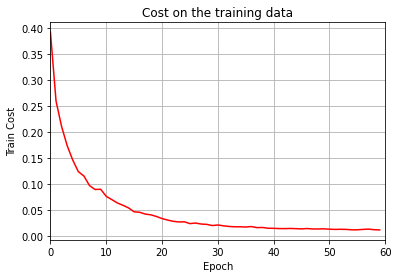

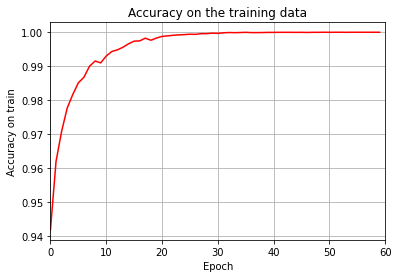

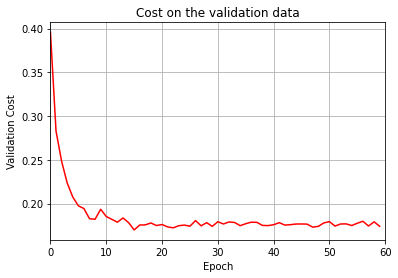

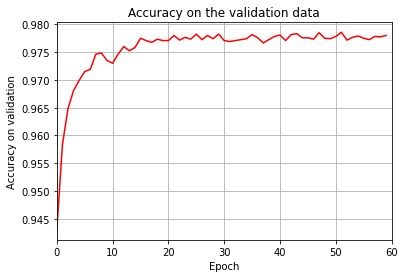

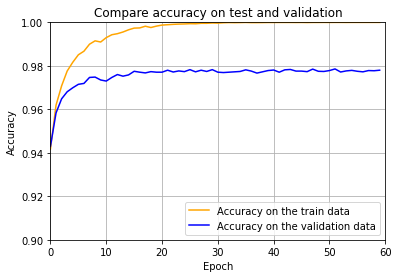

In [5]:
make_plots(data, epochs, training_cost_xmin=0, validation_cost_xmin=0,
           train_accuracy_xmin=0, validation_accuracy_xmin=0, overlay_ylim=0.9)

### Last 10 metrics

In [6]:
net.get_metrics(data)

	Metrics [50:60]:
Epoch 50: Cost_train[0.013533]..Acc_train[0.999958]..Cost_val[0.179313]..Acc_val[0.977833]
Epoch 51: Cost_train[0.013108]..Acc_train[0.999979]..Cost_val[0.174236]..Acc_val[0.978583]
Epoch 52: Cost_train[0.013338]..Acc_train[0.999979]..Cost_val[0.176658]..Acc_val[0.977167]
Epoch 53: Cost_train[0.013097]..Acc_train[0.999958]..Cost_val[0.176755]..Acc_val[0.977667]
Epoch 54: Cost_train[0.012329]..Acc_train[0.999979]..Cost_val[0.174879]..Acc_val[0.977917]
Epoch 55: Cost_train[0.012365]..Acc_train[0.999979]..Cost_val[0.177541]..Acc_val[0.977500]
Epoch 56: Cost_train[0.013089]..Acc_train[0.999979]..Cost_val[0.179759]..Acc_val[0.977250]
Epoch 57: Cost_train[0.013690]..Acc_train[0.999979]..Cost_val[0.174303]..Acc_val[0.977833]
Epoch 58: Cost_train[0.012540]..Acc_train[0.999979]..Cost_val[0.179128]..Acc_val[0.977750]
Epoch 59: Cost_train[0.012123]..Acc_train[0.999979]..Cost_val[0.174033]..Acc_val[0.978000]


### Test accuracy

In [8]:
print(f'Accuracy on test: {net.accuracy(test_data)}')

Accuracy on test: 0.9782


### Try to predict some images

Predicted number: 2
Real number: 2


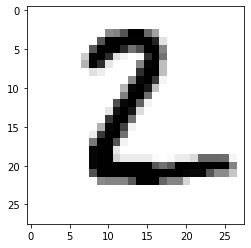

In [235]:
n = 1
x, y = test_data[n][0], test_data[n][1]

res = net.feedforward(x)
# print(res)
print(f'Predicted number: {np.argmax(res)}')
print(f'Real number: {y}')
plt.imshow(x.reshape(28,28), cmap=plt.cm.binary)
plt.show()

Predicted number: 1
Real number: 1


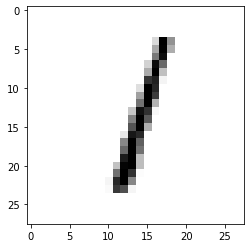

In [26]:
n = 2
x, y = test_data[n][0], test_data[n][1]

res = net.feedforward(x)
# print(res)
print(f'Predicted number: {np.argmax(res)}')
print(f'Real number: {y}')
plt.imshow(x.reshape(28,28), cmap=plt.cm.binary)
plt.show()

Predicted number: 0
Real number: 0


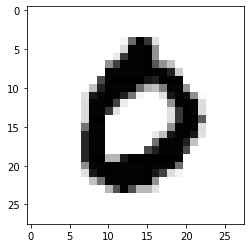

In [27]:
n = 3
x, y = test_data[n][0], test_data[n][1]

res = net.feedforward(x)
# print(res)
print(f'Predicted number: {np.argmax(res)}')
print(f'Real number: {y}')
plt.imshow(x.reshape(28,28), cmap=plt.cm.binary)
plt.show()

Predicted number: 4
Real number: 4


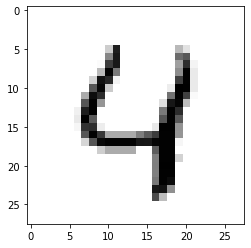

In [30]:
n = 4
x, y = test_data[n][0], test_data[n][1]

res = net.feedforward(x)
# print(res)
print(f'Predicted number: {np.argmax(res)}')
print(f'Real number: {y}')
plt.imshow(x.reshape(28,28), cmap=plt.cm.binary)
plt.show()

## predict some images

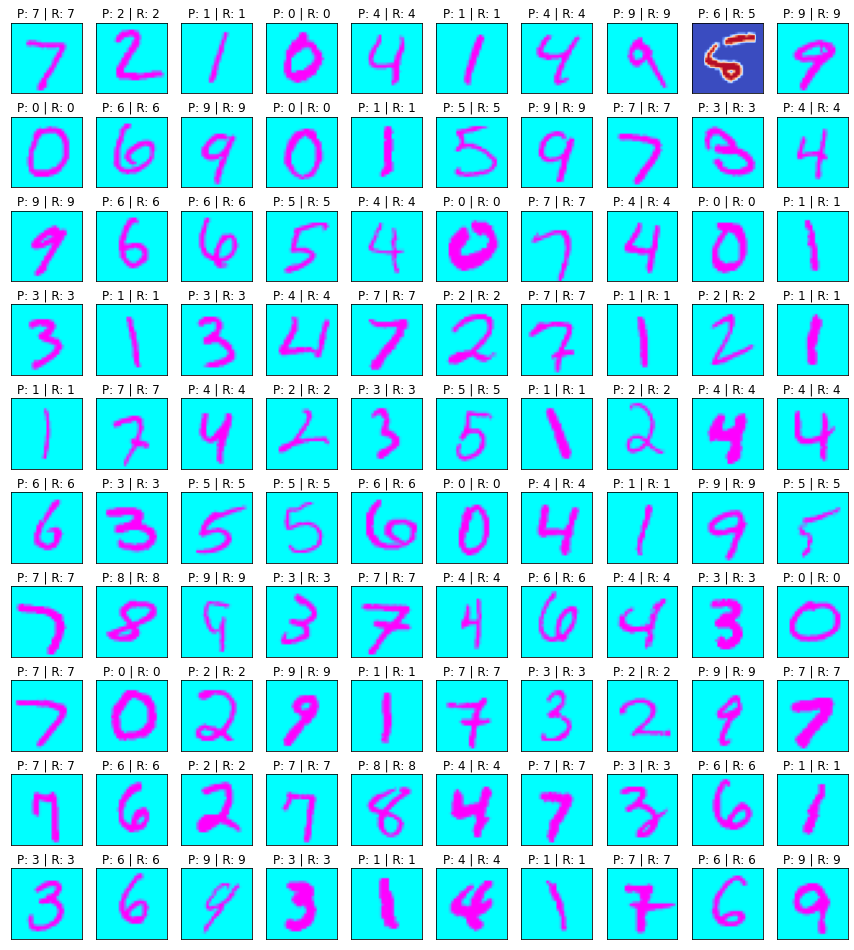

In [42]:
plt.figure(figsize=(15, 17))
for i in range(100):
    x, y = test_data[i][0], test_data[i][1]
    predicted = np.argmax(net.feedforward(x))
    ax = plt.subplot(10, 10, i+1)
    ax.set_title(f'P: {predicted} | R: {y}')
    ax.set_xticks([])
    ax.set_yticks([])
    if predicted == y:
        ax.imshow(x.reshape(28, 28), cmap=plt.cm.cool)
    else:
        ax.imshow(x.reshape(28, 28), cmap=plt.cm.coolwarm)

##  Numbers hard to predict

In [54]:
x_test = np.array([_x for _x, _ in test_data])
y_test = np.array([_y for _, _y in test_data])
pred = np.array([np.argmax(net.feedforward(x)) for x in x_test])
mask = pred == y_test
x_invalid = x_test[~mask]
pred_invalid = pred[~mask]
y_invalid = y_test[~mask]
print(f'Total test numbers: {len(x_test)}')
print(f'Total invalid predictions: {len(x_invalid)}')

Total test numbers: 10000
Total invalid predictions: 218


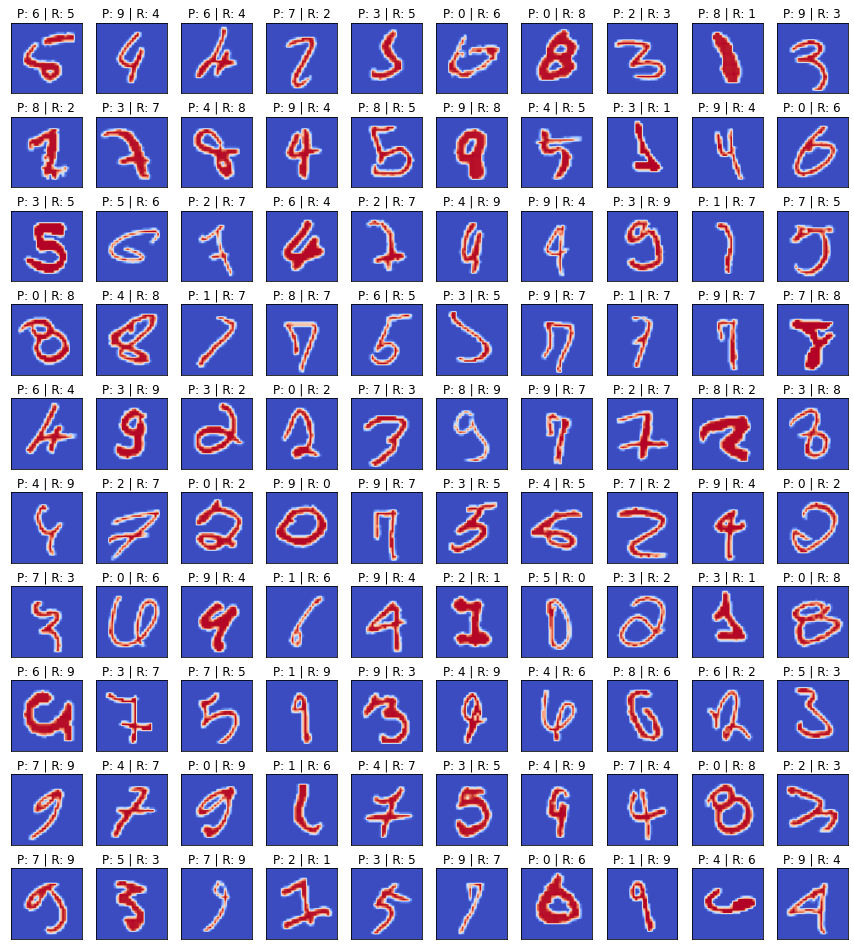

In [66]:
plt.figure(figsize=(15, 17))
for i in range(100):
    x, y = x_invalid[i], y_invalid[i]
    predicted = np.argmax(net.feedforward(x))
    ax = plt.subplot(10, 10, i+1)
    ax.set_title(f'P: {predicted} | R: {y}')
    ax.set_xticks([])
    ax.set_yticks([])
    if predicted == y:
        ax.imshow(x.reshape(28, 28), cmap=plt.cm.cool)
    else:
        ax.imshow(x.reshape(28, 28), cmap=plt.cm.coolwarm)
plt.show()

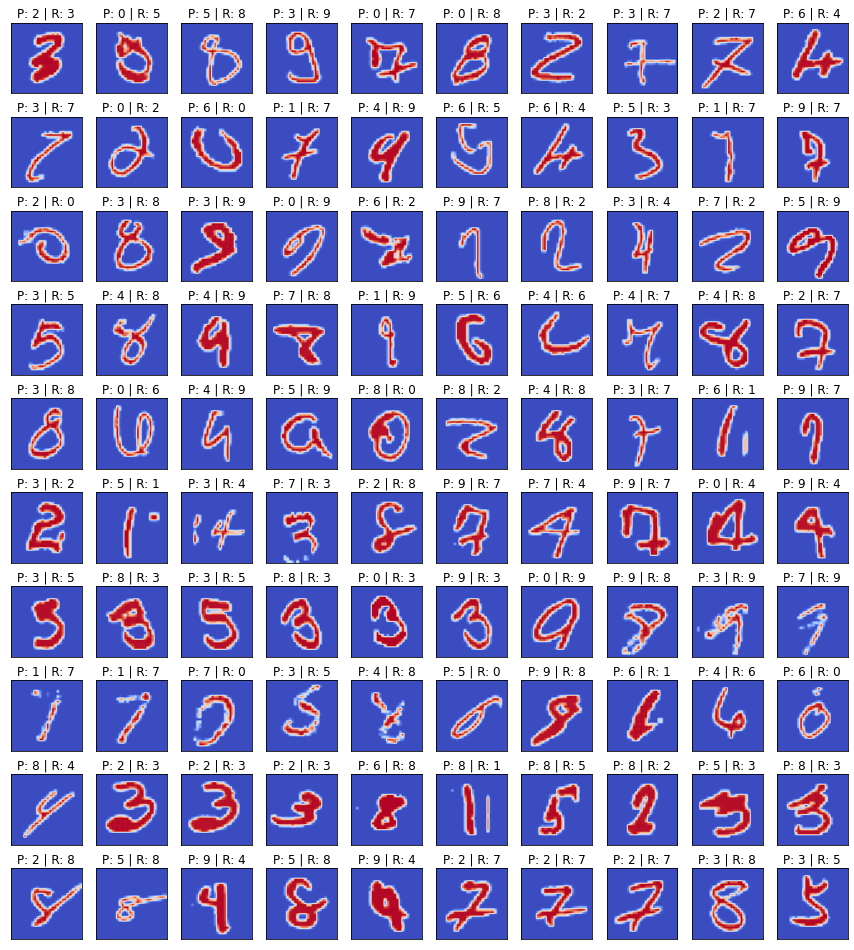

In [69]:
plt.figure(figsize=(15, 17))
for index, i in enumerate(range(100, 200)):
    x, y = x_invalid[i], y_invalid[i]
    predicted = np.argmax(net.feedforward(x))
    ax = plt.subplot(10, 10, index+1)
    ax.set_title(f'P: {predicted} | R: {y}')
    ax.set_xticks([])
    ax.set_yticks([])
    if predicted == y:
        ax.imshow(x.reshape(28, 28), cmap=plt.cm.cool)
    else:
        ax.imshow(x.reshape(28, 28), cmap=plt.cm.coolwarm)
plt.show()

## Recognize digits from web

In [372]:
def predict_image(imagepath, net, hard=30, axes=1):
    plt.figure(figsize=(10, 10))
    imagepath = 'test_nums/' + imagepath
    
    image_file = Image.open(imagepath)
    
    # to show
    real_file = image_file.copy()
    real_file = real_file.resize((28, 28))
    ax_real = plt.subplot(axes, 2, 1)
    ax_real.imshow(real_file, cmap=plt.cm.binary)
    ax_real.set_title('Real number')
    
    
    # to grey scale
    image_file = image_file.convert('L')
    
    # revert black -> white, white->black
    image_file = ImageOps.invert(image_file)
        
    # resize
    image_file = image_file.resize((28, 28))
    
    im_arr = np.array(image_file.getdata()).reshape((784, 1))
    
    # remove background to 0
    im_arr[im_arr < hard] = 0
    
    predicted_seq = net.feedforward(im_arr)
    
    pred_num = [(index, i) for index, i in enumerate(predicted_seq)]
    pred_best = sorted(pred_num, key=lambda x: x[1], reverse=True)
    
    top_n = 5
    for i in range(top_n):
        print(f'{i+1}. Number: {pred_best[i][0]} | {pred_best[i][1]}')

    predicted = pred_best[0][0]
    print(f'Predicted number: {predicted}')
    ax_changed = plt.subplot(axes, 2, 2)
    ax_changed.imshow(im_arr.reshape((28, 28)), cmap=plt.cm.binary)
    ax_changed.set_title('Changed for predicrtion')

1. Number: 0 | [0.92020041]
2. Number: 9 | [0.0004023]
3. Number: 2 | [0.00036712]
4. Number: 4 | [2.090329e-06]
5. Number: 8 | [1.67763505e-06]
Predicted number: 0


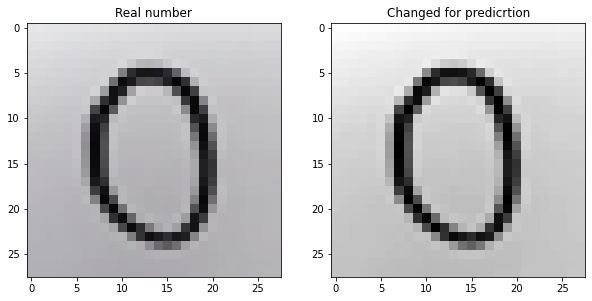

In [406]:
predict_image('mnist-0.png', net, hard=0)

1. Number: 5 | [0.097974]
2. Number: 8 | [0.04650663]
3. Number: 3 | [0.0129351]
4. Number: 9 | [4.36190414e-08]
5. Number: 0 | [4.1442218e-08]
Predicted number: 5


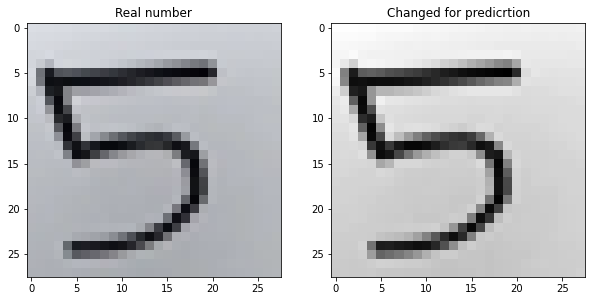

In [407]:
predict_image('mnist-5.png', net, hard=0)

1. Number: 1 | [0.13177222]
2. Number: 3 | [0.0234271]
3. Number: 8 | [0.00134525]
4. Number: 7 | [0.00040905]
5. Number: 2 | [5.31959618e-05]
Predicted number: 1


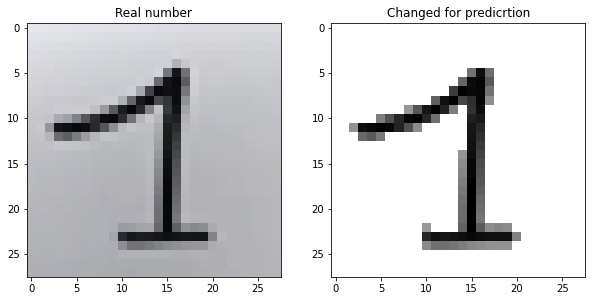

In [416]:
predict_image('mnist-1.png', net, hard=100)

## Hand written digits

1. Number: 1 | [0.98406984]
2. Number: 3 | [0.00024329]
3. Number: 7 | [8.97901664e-05]
4. Number: 5 | [1.41490463e-06]
5. Number: 2 | [2.02394443e-07]
Predicted number: 1


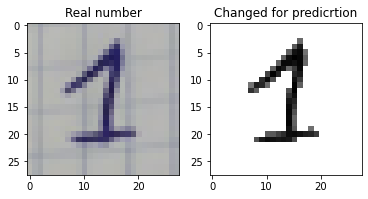

In [308]:
predict_image('hand-1.png', net, hard=120)

In [391]:
def predict_group(files, hard=100):
    plt.figure(figsize=(5, 30))
    for index, file in enumerate(files):
        n_files = len(files)
        image_file = Image.open(file)

        # to show
        real_file = image_file.copy()
        real_file = real_file.resize((28, 28))
        ax_real = plt.subplot(n_files, 2, index*2 + 1)
        ax_real.imshow(real_file, cmap=plt.cm.binary)
        ax_real.set_title('Real number')


        # to grey scale
        image_file = image_file.convert('L')

        # revert black -> white, white->black
        image_file = ImageOps.invert(image_file)

        # resize
        image_file = image_file.resize((28, 28))

        im_arr = np.array(image_file.getdata()).reshape((784, 1))

        # remove background to 0
        im_arr[im_arr < hard] = 0

        predicted_seq = net.feedforward(im_arr)

        pred_num = [(index, i) for index, i in enumerate(predicted_seq)]
        pred_best = sorted(pred_num, key=lambda x: x[1], reverse=True)

        top_n = 5

        predicted = pred_best[0][0]

        ax_changed = plt.subplot(n_files, 2, index*2 + 2)
        ax_changed.imshow(im_arr.reshape((28, 28)), cmap=plt.cm.binary)
        ax_changed.set_title(f'Changed. Pred = {predicted}')

## Pridict our hand written digits

In [398]:
files = ['test_nums/' + file for file in os.listdir(os.path.join(os.getcwd(), 'test_nums')) \
         if file.startswith('hand')]

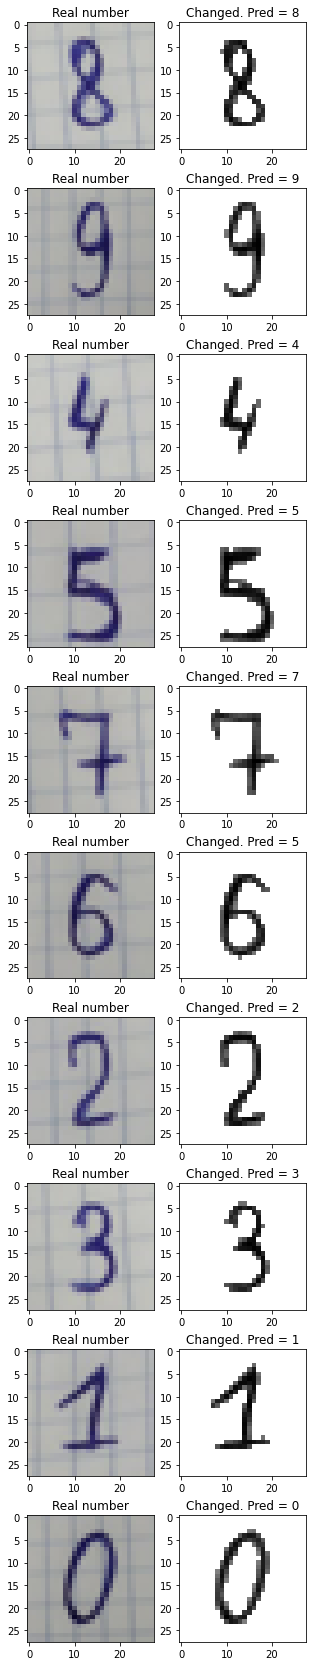

In [399]:
predict_group(files, hard=120)